# **Linear Regression - Gradient Descent**

*   This is an interactive python notebook for linear regression model from scratch using Gradient Descent
* This code can be used for datasets in which our target variable is dependent of 1 or more attributes.
* Author: [Anniebhalla16](https://github.com/Anniebhalla16)


In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

**Defining Linear Regression**

In [28]:
class LinearRegression:
  def __init__(self, learning_rate=0.01, number_of_iterations=10000):
    self.number_of_iterations = number_of_iterations
    self.learning_rate = learning_rate

  def train(self, X, y):
    self.m, self.n= X.shape

    self.bias = np.zeros(1)
    self.weights = np.zeros(self.n)
    self.losses = []

    for _ in range(self.number_of_iterations):
      # calculating the predicted value
      y_hat = np.dot(X, self.weights) + self.bias


      # calculating derivatives
      dw =  (1 / self.m) * np.dot(X.T, (y_hat - y))
      db = (1 / self.m) * np.sum(y_hat - y)

      # updating weights and bias
      self.weights -= self.learning_rate * dw
      self.bias -= self.learning_rate * db

      loss = np.mean((y - y_hat) ** 2)
      self.losses.append(loss)

  def predict(self, X):
    return X * self.weights + self.bias


  def r_sq_score(self, X, y_test, y_pred):
    tss = 0
    rss = 0

    tss = np.sum((y_test - np.mean(y_test)) ** 2)
    rss = np.sum((y_test - y_pred) ** 2)
    r2_score = 1 - (rss / tss)

    return r2_score


**Loading Dataset**

In [29]:
data = pd.read_csv('/content/sample_data/california_housing_train.csv')
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0


In [30]:
X = np.array(data.drop(['median_house_value'], axis=1))
y = np.array(data['median_house_value'])

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

**Split dataset for training and testing**

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled,y, test_size=0.2, random_state=100)

**Train model on training samples and predict values for test samples**

In [32]:
model = LinearRegression()

model.train(X_train, y_train)
y_pred = model.predict(X_test)

print(f'Weight:{model.weights}')
print(f'Bias:{model.bias}')

Weight:[-85162.35866388 -90825.68201805  14758.17591425 -18188.8078246
  45488.59681753 -44215.60178028  22365.47325372  76942.97223882]
Bias:[207351.2905099]


**Plotting the line of regression**

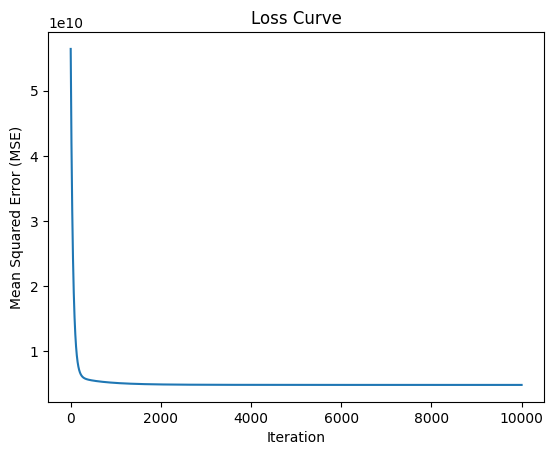

In [33]:
plt.plot(model.losses)
plt.title('Loss Curve')
plt.xlabel('Iteration')
plt.ylabel('Mean Squared Error (MSE)')
plt.show()

Since our target variable is dependent on multiple attributes the regression lines considering only one attribute and target variable do not provide meaningful information.

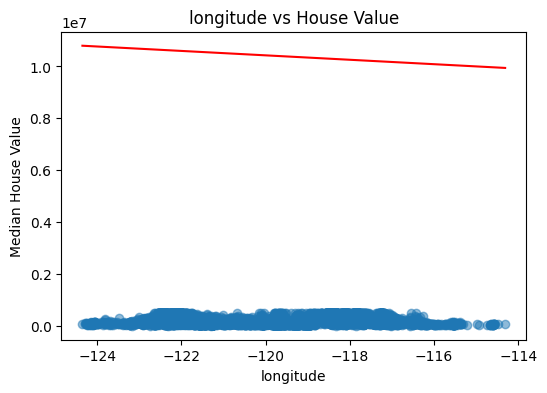

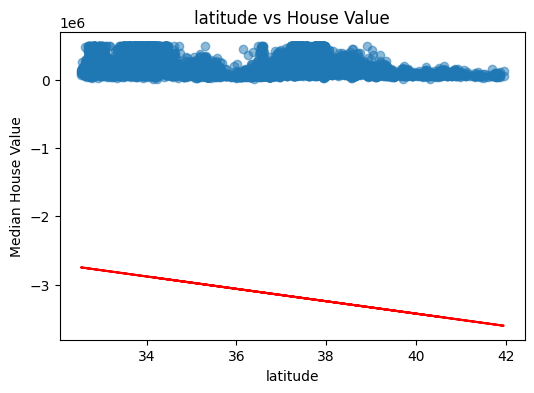

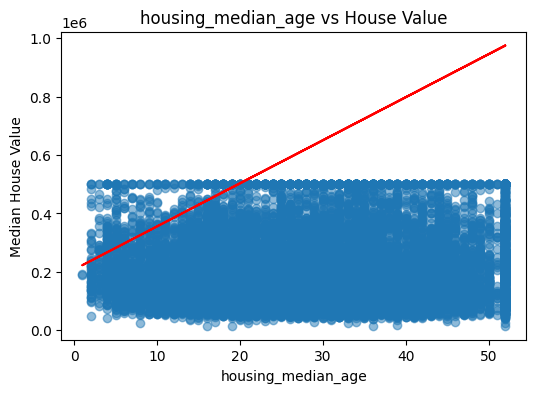

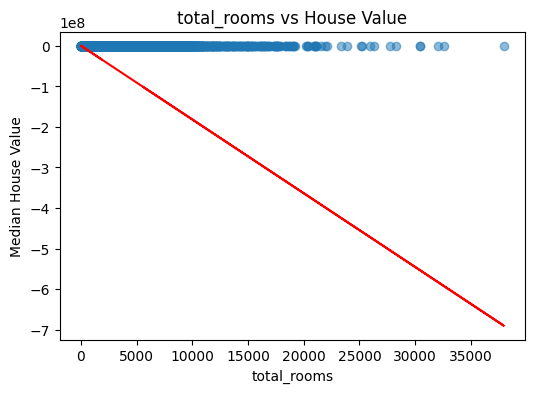

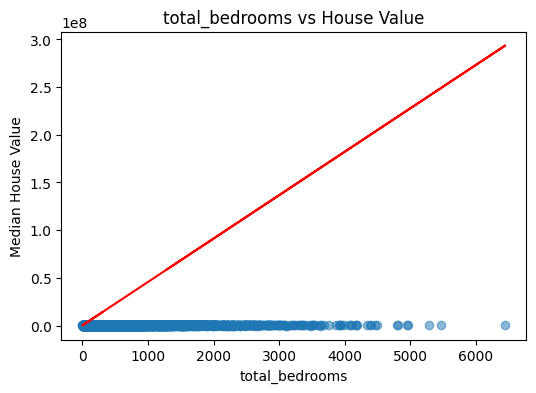

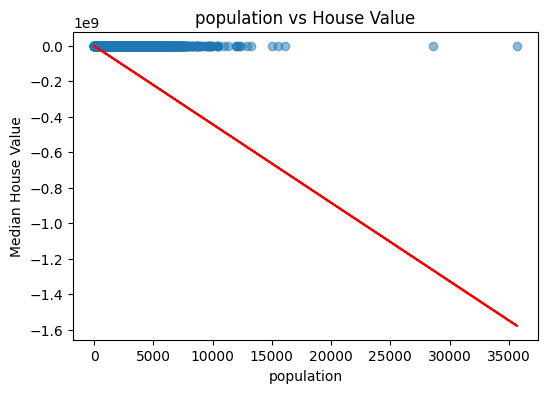

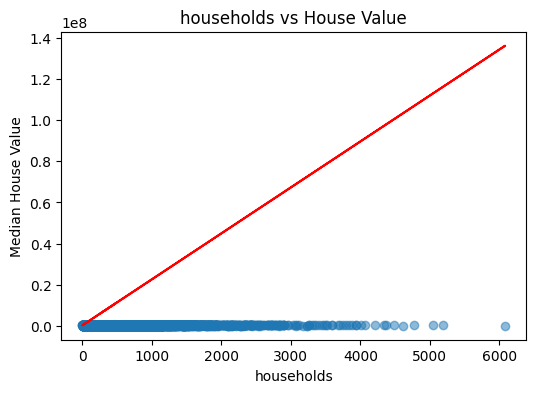

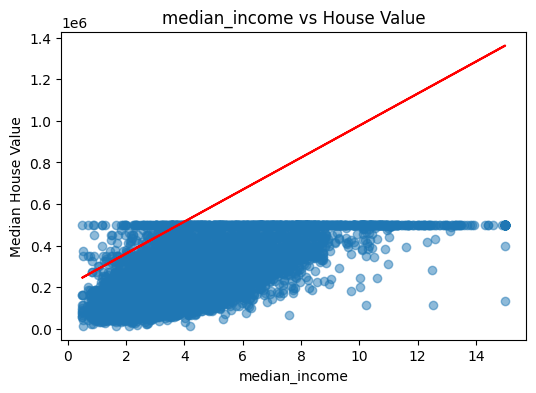

In [35]:
feature_names = list(data.columns[:-1])  # all columns except 'median_house_value'

for i in range(len(feature_names)):
    plt.figure(figsize=(6,4))
    plt.scatter(X[:, i], y, alpha=0.5)
    plt.plot(X[:, i], model.weights[i] * X[:, i] + model.bias, color='red')
    plt.xlabel(feature_names[i])
    plt.ylabel('Median House Value')
    plt.title(f'{feature_names[i]} vs House Value')
    plt.show()